In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# some imports to set up plotting 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Step1: Import file to colab
from google.colab import files
files.upload()

Saving telecom_churn_dataset.csv to telecom_churn_dataset.csv


{'telecom_churn_dataset.csv': b'State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn\nKS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False\nOH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False\nNJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False\nOH,84,408,Yes,No,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False\nOK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False\nAL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False\nMA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False\nMO,147,415,Yes,No,0,157.0,79,26.69,1

In [ ]:
## Load the dataset and read the data
df = pd.read_csv("telecom_churn_dataset.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
## Total number of records
print("The total number of records in the dataset:")
df.shape

The total number of records in the dataset:


(3333, 20)

In [ ]:
## The features available and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
## converting the datatype churn from bool to int
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

1. From the above observation there are **3 features of type object** and **17 features of type numeric**.

2. There are **no null values or NaN**, as each column contains 3333 observations.

In [ ]:
## Descriptive statistics of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


describe method shows basic characteristics of each numerical feature.

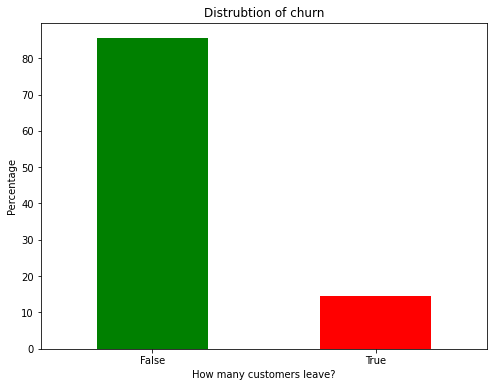

In [ ]:
## Did the customers leave the Communication service provider?
colors = ['green', 'red']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', rot = 0, color = colors, figsize = (8,6))
ax.set_title("Distrubtion of churn")
ax.set_ylabel("Percentage")
ax.set_xlabel("How many customers leave?")
plt.show();

**In the dataset provided, close to 20% customers churned, while the rest remained with the service provider.**

In [ ]:
churn_stats=(df['Churn'].value_counts()*100/df.shape[0]).reset_index()
churn_stats.columns = ['Churn Flag', 'Churn Percentage']
print(churn_stats)

px.pie(churn_stats, names="Churn Flag", values="Churn Percentage",title="Customer Attrition Rate")

   Churn Flag  Churn Percentage
0           0         85.508551
1           1         14.491449


14.5% is actually quite bad for a company, because of this the company can go bankrupt.

**Inference**

Except Area Code percentage distribution of churn is varying in other qualitative varibles like State, Voice mail plan and International Plan

**Hypothesis**

Churn is independent of Area Code any customer is living

Churn is dependent of State, Voice mail plan and International Plan

In [ ]:
 ## average values of all numerical features for churned users
 df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
dict = {False:0,True:1}
df["Churn"] = df["Churn"].map(dict)

In [ ]:
df['Churn'][:12]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
Name: Churn, dtype: int64

In [ ]:
##  "International plan" column replace 'No' -> False and 'Yes' -> True
dict1 = {"No":0,"Yes":1}
df["International plan"] = df["International plan"].map(dict1)

In [ ]:
## Using same dictionary "dict1" to  replace column "Voice mail plan"
df["Voice mail plan"]  = df["Voice mail plan"].map(dict1)

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


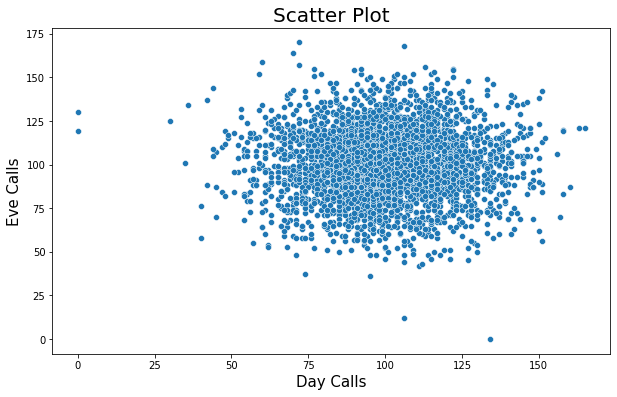

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(df["Total day calls"], df["Total eve calls"])
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Day Calls",fontsize=15)
plt.ylabel("Eve Calls",fontsize=15)
plt.show()

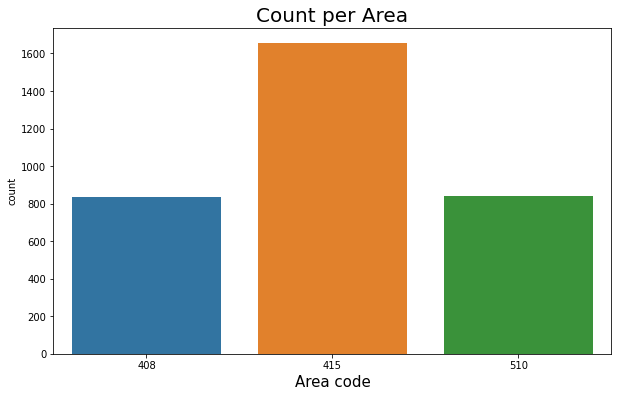

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(df["Area code"])
plt.title("Count per Area",fontsize=20)
plt.xlabel("Area code",fontsize=15)
plt.show()

In [ ]:
df[(df["Churn"]==0 & (df["International plan"]==0))]["Total day calls"].mean()

100.28315789473685

In [ ]:
df[(df["Churn"]==0 & (df["International plan"]==0))]["Total intl minutes"].mean()

10.158877192982445

In [ ]:
df.apply(np.max)  # would find max value for each column

State                        WY
Account length              243
Area code                   510
International plan            1
Voice mail plan               1
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [ ]:
## select all states starting with W. 
df[df["State"].apply(lambda x: x[0]=="W")]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,0,1,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,0,0,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,0,1,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,0,0,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,0,0,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,0
3303,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3319,WY,89,415,0,0,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,0
3324,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [ ]:
# group the data according to the values of the Churn variable 
# and display statistics of three columns in each group:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

In [ ]:
# percentiles=[] supresses calculation of 25%ile and 75%ile
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[]).transpose()

Churn                                0           1
Total day minutes   count  2850.000000  483.000000
                    mean    175.175754  206.914079
                    std      50.181655   68.997792
                    min       0.000000    0.000000
                    50%     177.200000  217.600000
                    max     315.600000  350.800000
Total eve minutes   count  2850.000000  483.000000
                    mean    199.043298  212.410145
                    std      50.292175   51.728910
                    min       0.000000   70.900000
                    50%     199.600000  211.300000
                    max     361.800000  363.700000
Total night minutes count  2850.000000  483.000000
                    mean    200.133193  205.231677
                    std      51.105032   47.132825
                    min      23.200000   47.400000
                    50%     200.250000  204.800000
                    max     395.000000  354.900000

In [ ]:
df.groupby(['Churn'])[columns_to_show].agg([np.mean,np.std])

Total day minutes             ... Total night minutes           
                   mean        std  ...                mean        std
Churn                               ...                               
0            175.175754  50.181655  ...          200.133193  51.105032
1            206.914079  68.997792  ...          205.231677  47.132825

[2 rows x 6 columns]

In [ ]:
df.groupby(['International plan'])[columns_to_show].agg([np.max,np.min,np.mean])

Total day minutes        ... Total night minutes            
                                amax  amin  ...                amin        mean
International plan                          ...                                
0                              350.8   0.0  ...                23.2  201.350831
1                              346.8  12.5  ...                72.4  196.410217

[2 rows x 9 columns]

In [ ]:
##Let’s take a look at the average number of day, evening, and night calls by area code:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],['Churn'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Churn,,,
0,100.283158,100.038596,100.058246
1,101.335404,100.561077,100.399586


In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['International plan'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
International plan,,,
0,100.410963,100.074419,100.027907
1,100.665635,100.486068,100.851393


In [ ]:
## Calculate the total number of calls for all users.
df["Total Calls"] = df["Total day calls"]+ df["Total eve calls"]+ df["Total night calls"]+ df["Total intl calls"]

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


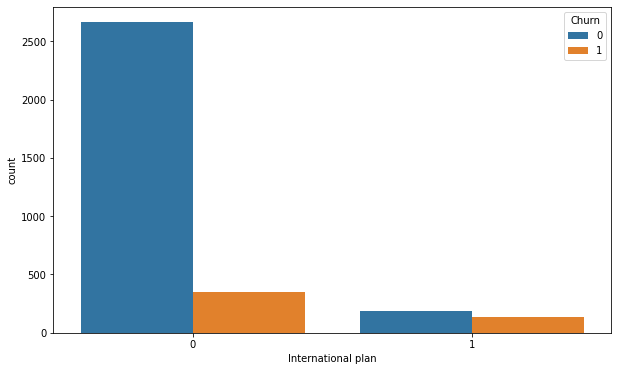

In [ ]:
## Ploting a vertical bar graph showing count of customers using 'International Plan' under both the churn categories. 
sns.countplot(df["International plan"], hue = df["Churn"]);

Observation : We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

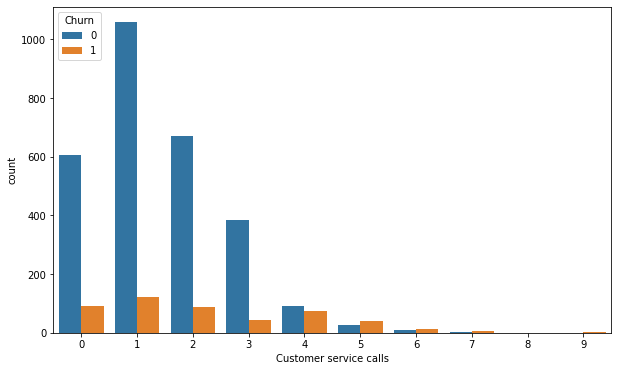

In [ ]:
sns.countplot(df["Customer service calls"], hue = df["Churn"]);

Observation: Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

In [ ]:
df.loc[df["Churn"]==0]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,292
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,239
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,264
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,336


In [ ]:
df.iloc[-1]

State                        TN
Account length               74
Area code                   415
International plan            0
Voice mail plan               1
Number vmail messages        25
Total day minutes         234.4
Total day calls             113
Total day charge          39.85
Total eve minutes         265.9
Total eve calls              82
Total eve charge           22.6
Total night minutes       241.4
Total night calls            77
Total night charge        10.86
Total intl minutes         13.7
Total intl calls              4
Total intl charge           3.7
Customer service calls        0
Churn                         0
Total Calls                 276
Name: 3332, dtype: object

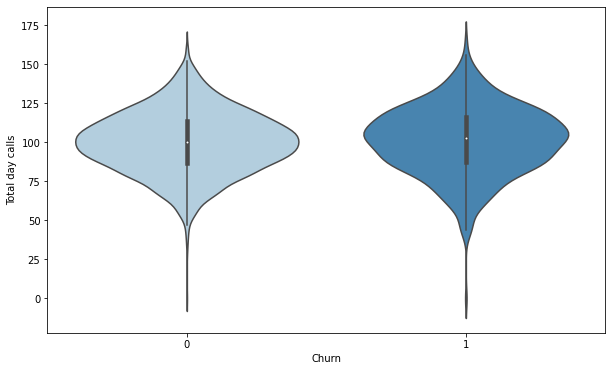

In [ ]:
sns.violinplot(x=df["Churn"], y=df["Total day calls"], palette = "Blues");

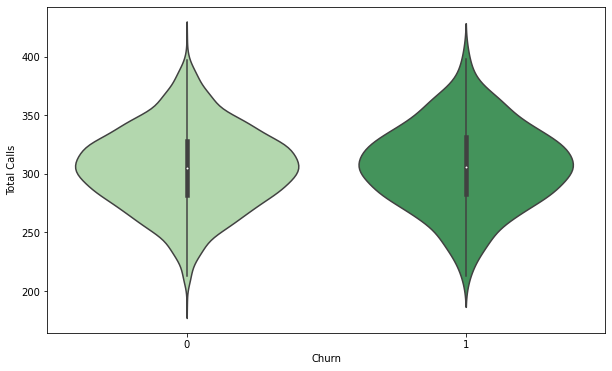

In [ ]:
sns.violinplot(x=df["Churn"], y=df["Total Calls"], palette = "Greens");

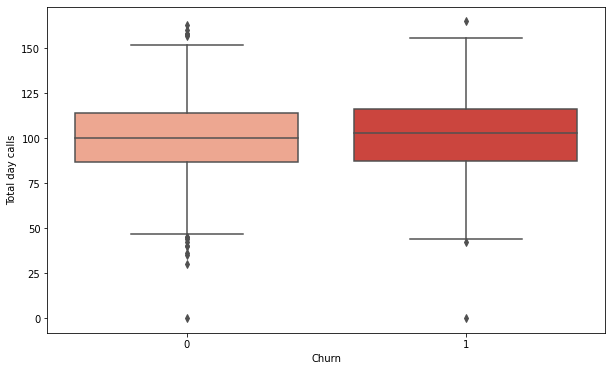

In [ ]:
sns.boxplot(x=df["Churn"], y=df["Total day calls"], palette = "Reds");

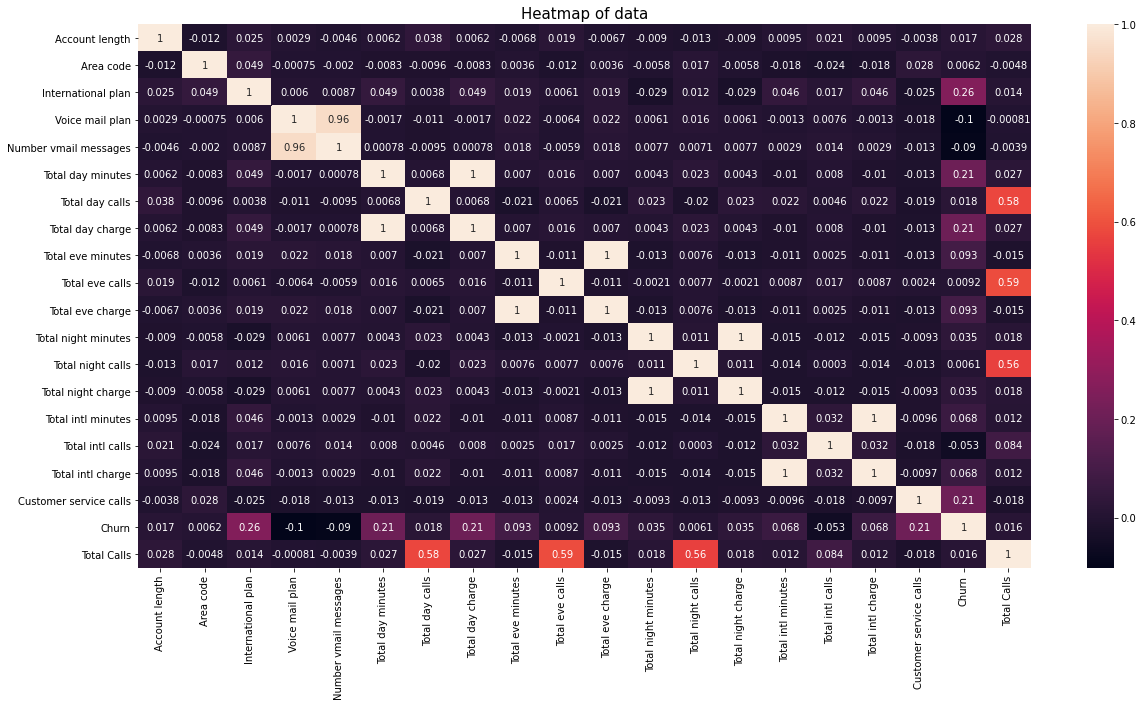

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df[:].corr(), annot = True)
plt.title("Heatmap of data",fontsize= 15)
plt.show()

In [ ]:
## Add a binary feature to our DataFrame – Customer service calls > 3. And see how it relates to churn.
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


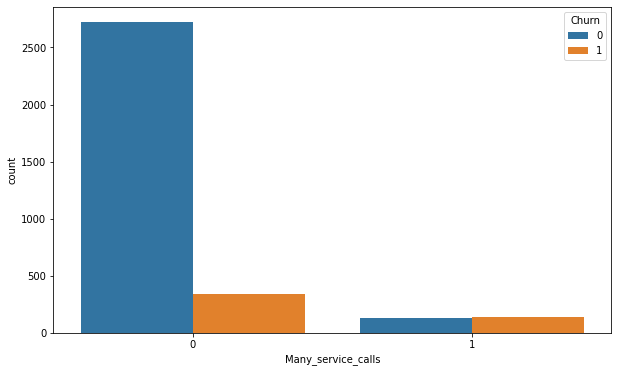

In [ ]:
# plot 'Many_service_calls'  vs. 'Churn'

plt.rcParams["figure.figsize"] = (10,6)
sns.countplot(df['Many_service_calls'], hue= df['Churn']);

In [ ]:
## table that relates Churn 
# with both International plan and freshly created Many_service_calls.

pd.crosstab(df['Many_service_calls'] & df['International plan'], df['Churn'])

Churn,0,1
row_0,,
0,2841,464
1,9,19


**Conclusion:**

The share of loyal clients in the sample is ~ 85%. 

"International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of ~85%

